<a href="https://colab.research.google.com/github/NeonLabs146/General_stuffs/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gradient Descent**

In [19]:
def gradient_descent(X, y, learning_rate, num_iters):
    """
    Performs gradient descent to find optimal weights and bias for linear regression.

    Args:
        X: A numpy array of shape (m, n) representing the training data features.
        y: A numpy array of shape (m,) representing the training data target values.
        learning_rate: The learning rate to control the step size during updates.
        num_iters: The number of iterations to perform gradient descent.

    Returns:
        A tuple containing the learned weights, bias, and list of costs at each iteration.
    """
    m, n = X.shape
    weights = np.random.rand(n)
    bias = 0
    costs = []

    for i in range(num_iters):
        y_predicted = np.dot(X, weights) + bias
        error = y - y_predicted

        # Calculate the cost (Mean Squared Error)
        cost = np.mean(error ** 2)
        costs.append(cost)

        # Calculate gradients
        weights_gradient = -2/m * np.dot(X.T, error)
        bias_gradient = -2/m * np.sum(error)

        # Update weights and bias
        weights -= learning_rate * weights_gradient
        bias -= learning_rate * bias_gradient

    return weights, bias, costs

# Example usage
X = np.array([[1, 1], [2, 2], [3, 3]])
y = np.array([2, 4, 5])
learning_rate = 0.01
num_iters = 100

weights, bias, costs = gradient_descent(X, y, learning_rate, num_iters)

This code creates a function callled gradient_descent, which requires the training data, learning rate, and number of iterations as parameters. It carrries out the Number of steps:
1. Sets the weights amd bias to arbitrary values during initialization.
2. Executes a set number of iterations for loops.
3. Computes the estimated y values by initializing the existing weights and bias.
4. Calculate the discrepancy between expected and real y values.
5. Determinr the changes in the cost function based on weights and bias.
6. Adjust the weights and bias by incorporating the griadients and learning rate.
7. Output the acquire weights and bias.

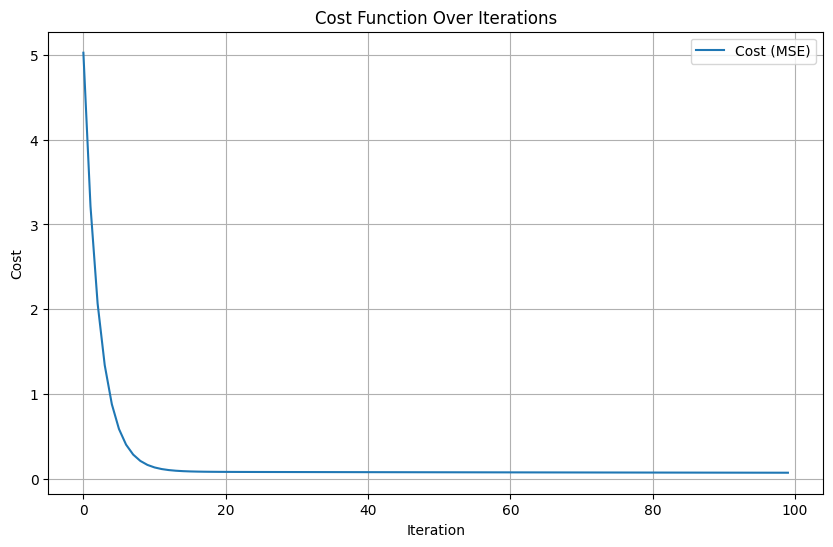

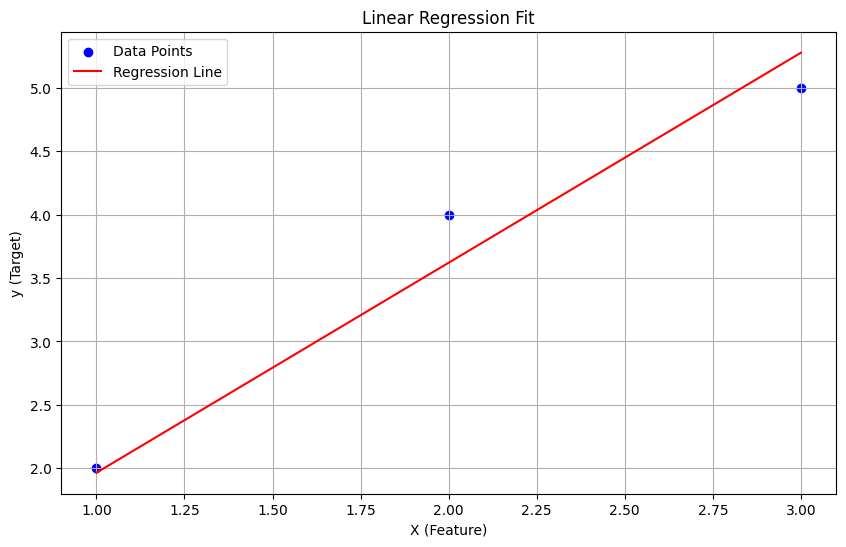

Learned weights: [0.62718462 1.02747712]
Learned bias: 0.3108422638423418


In [20]:
import matplotlib.pyplot as plt

# Plotting the cost function over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(num_iters), costs, label="Cost (MSE)")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function Over Iterations")
plt.legend()
plt.grid()
plt.show()

# Visualizing the fit on the data points
plt.figure(figsize=(10, 6))
y_predicted = np.dot(X, weights) + bias
plt.scatter(X[:, 0], y, color="blue", label="Data Points")
plt.plot(X[:, 0], y_predicted, color="red", label="Regression Line")
plt.xlabel("X (Feature)")
plt.ylabel("y (Target)")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid()
plt.show()

print("Learned weights:", weights)
print("Learned bias:", bias)

Iteration 1: Cost 4352.088931274409, Weight         0.7593291142562117, Bias 0.02288558130709
Iteration 2: Cost 1114.8561474350017, Weight         1.081602958862324, Bias 0.02918014748569513
Iteration 3: Cost 341.42912086804455, Weight         1.2391274084945083, Bias 0.03225308846928192
Iteration 4: Cost 156.64495290904443, Weight         1.3161239281746984, Bias 0.03375132986012604
Iteration 5: Cost 112.49704004742098, Weight         1.3537591652024805, Bias 0.034479873154934775
Iteration 6: Cost 101.9493925395456, Weight         1.3721549833978113, Bias 0.034832195392868505
Iteration 7: Cost 99.4293893333546, Weight         1.3811467575154601, Bias 0.03500062439068245
Iteration 8: Cost 98.82731958262897, Weight         1.3855419247507244, Bias 0.03507916814736111
Iteration 9: Cost 98.68347500997261, Weight         1.3876903144657764, Bias 0.035113776874486774
Iteration 10: Cost 98.64910780902792, Weight         1.3887405007983562, Bias 0.035126910596389935
Iteration 11: Cost 98.6408

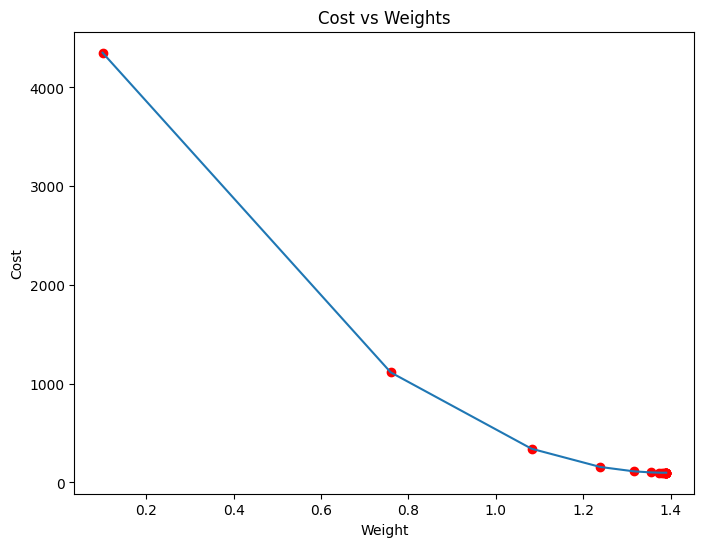

Estimated Weight: 1.389738813163012
Estimated Bias: 0.03509461674147458


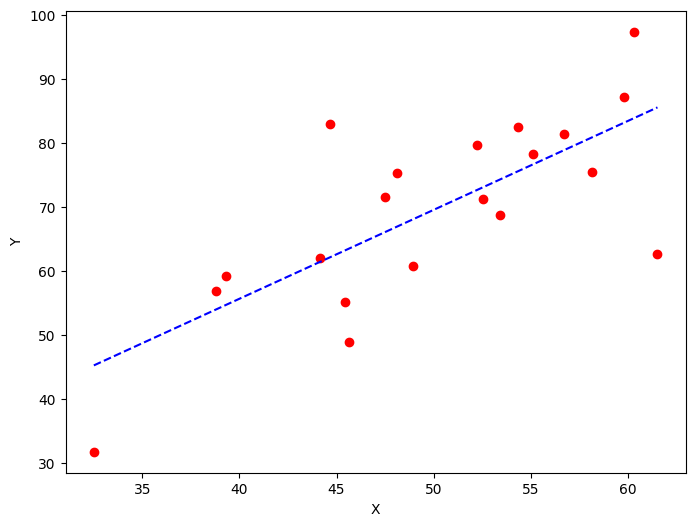

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def mean_squared_error(y_true, y_predicted):

    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold are hyperparameters that can be tuned
def gradient_descent(x, y, iterations, learning_rate = 0.0001, stopping_threshold = 1e-6):

    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))

    costs = []
    weights = []
    previous_cost = None

    # Estimation of optimal parameters
    for i in range(iterations):

        # Making predictions
        y_predicted = (current_weight * x) + current_bias

        # Calculationg the current cost
        current_cost = mean_squared_error(y, y_predicted)

        # If the change in cost is less than or equal to stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break

        previous_cost = current_cost

        costs.append(current_cost)
        weights.append(current_weight)

        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)

        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)

        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")


    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()

    return current_weight, current_bias


def main():

    # Data
    X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
           55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
           45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
           48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
    Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
           78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
           55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
           60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

    # Estimating weight and bias using gradient descent
    estimated_weight, eatimated_bias = gradient_descent(X, Y, iterations=2000)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {eatimated_bias}")

    # Making predictions using estimated parameters
    Y_pred = estimated_weight*X + eatimated_bias

    # Plotting the regression line
    plt.figure(figsize = (8,6))
    plt.scatter(X, Y, marker='o', color='red')
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
             markersize=10,linestyle='dashed')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


if __name__=="__main__":
    main()

**Vanishing Gradient**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
X,y = make_moons(n_samples=250, noise=0.05, random_state=42)

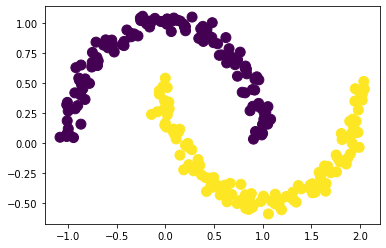

In [ ]:
plt.scatter(X[:,0],X[:,1], c=y, s=100)
plt.show()

In [ ]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.get_weights()[0]

array([[-0.33058235,  0.292853  , -0.5027271 , -0.01332176,  0.4663965 ,
        -0.08549386, -0.3767269 ,  0.02521479,  0.17957473,  0.09508276],
       [-0.46751493, -0.5052102 ,  0.618305  , -0.41437078,  0.51485544,
         0.45250946,  0.36829787,  0.66284555,  0.14777309,  0.04143274]],
      dtype=float32)

In [ ]:
old_weights = model.get_weights()[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 [==============================] - 1s 3ms/step - loss: 0.6966 - accuracy: 0.3700
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.1650
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.3050
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.2800
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.1250
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5100
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5100
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5100
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5100
Epoch 11/100
7/7 [===========

In [ ]:
new_weights = model.get_weights()[0]

In [ ]:
model.optimizer.get_config()["learning_rate"]

0.001

In [ ]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [ ]:
gradient

array([[ 0.01093745,  0.0115037 ,  0.01388788, -0.01996755, -0.05242321,
        -0.00369549,  0.01478195,  0.03504753,  0.02288818, -0.00494719],
       [-0.02099573, -0.02273917, -0.02834201,  0.04476308,  0.09220838,
         0.00709295, -0.02682209, -0.06717443, -0.05042553,  0.00888109]],
      dtype=float32)

In [ ]:
percent_change

array([[0.0072271 , 0.00210111, 0.00679461, 0.00370892, 0.36522916,
        0.00057803, 0.00331642, 0.00498917, 0.00324947, 0.00184224],
       [0.01097624, 0.00796773, 0.00666361, 0.01916067, 0.01916059,
        0.00211133, 0.0059982 , 0.01164935, 0.01972343, 0.00127616]],
      dtype=float32)

In [ ]:
old_weights

array([[-0.33058235,  0.292853  , -0.5027271 , -0.01332176,  0.4663965 ,
        -0.08549386, -0.3767269 ,  0.02521479,  0.17957473,  0.09508276],
       [-0.46751493, -0.5052102 ,  0.618305  , -0.41437078,  0.51485544,
         0.45250946,  0.36829787,  0.66284555,  0.14777309,  0.04143274]],
      dtype=float32)

In [ ]:
new_weights

array([[ 0.40518048,  0.6488755 , -0.985546  ,  0.6181405 ,  1.034089  ,
        -0.7342173 , -0.5503599 ,  0.18725553,  0.81843793, -0.69256586],
       [-1.5294187 , -1.299696  ,  1.6635121 , -1.4268929 , -0.56944025,
         1.5625011 ,  0.9726272 ,  0.81920713, -0.9686132 ,  1.2659652 ]],
      dtype=float32)

In [ ]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
old_weights = model.get_weights()[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 [==============================] - 2s 6ms/step - loss: 0.6932 - accuracy: 0.4900
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6925 - accuracy: 0.5200
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.6950
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.7950
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.8300
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6835 - accuracy: 0.8350
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.8550
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6725 - accuracy: 0.8750
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6635 - accuracy: 0.8850
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6516 - accuracy: 0.8900
Epoch 11/100
7/7 [===========

In [ ]:
new_weights = model.get_weights()[0]

In [ ]:
model.optimizer.get_config()["learning_rate"]

0.001

In [ ]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [ ]:
gradient

array([[ 6.685495  , -3.4646986 , -5.3832526 ,  6.741613  , -6.8466363 ,
         5.8019753 , -6.013676  ,  2.311021  ,  0.31654534,  1.327753  ],
       [-5.534008  ,  2.8640625 ,  4.297107  , -6.487876  ,  6.334662  ,
        -5.206227  ,  0.72604764, -4.4065375 , -1.9274204 , -6.5084095 ]],
      dtype=float32)

In [ ]:
percent_change

array([[ 1.1875801 ,  0.61953056,  1.5359294 ,  1.9122909 ,  1.6018827 ,
         1.2191677 ,  5.3679805 ,  0.7799734 ,  0.15018749,  0.25854072],
       [ 5.258102  ,  0.9604039 ,  1.1871884 ,  1.2909728 ,  1.2937336 ,
         0.87578124, 26.933157  , 12.894475  ,  1.8821074 ,  2.2091355 ]],
      dtype=float32)

In [ ]:
old_weights

array([[-0.06470567,  0.38120002,  0.2564506 ,  0.4796242 , -0.41284758,
         0.12111282,  0.3640564 , -0.11997336, -0.7036418 , -0.12918228],
       [ 0.4177161 , -0.646973  ,  0.5538413 ,  0.14968556, -0.1020028 ,
        -0.25845426, -0.1095776 ,  0.22031492, -0.01622504, -0.3014395 ]],
      dtype=float32)

In [ ]:
new_weights

array([[-0.00357266,  0.42682663,  0.36751232,  0.6510883 , -0.47869346,
         0.22171871,  0.4815479 , -0.20610414, -0.73377985, -0.09355866],
       [ 0.4225647 , -0.76475453,  0.56343955,  0.08604728, -0.1019215 ,
        -0.35053518, -0.19012658,  0.28164935,  0.21199906, -0.29813236]],
      dtype=float32)